In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../Downloads/housing.csv")

In [5]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [9]:
df.isna().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

<AxesSubplot:>

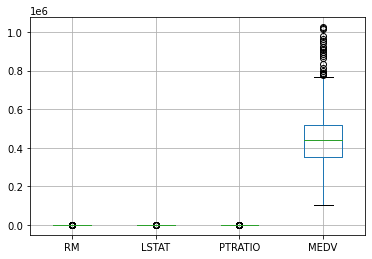

In [10]:
df.boxplot()

In [12]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
IQR

RM              0.695
LSTAT           9.750
PTRATIO         2.800
MEDV       168000.000
dtype: float64

In [13]:
o_df=df[~((df<(Q1-1.5*IQR)) | (df> (Q3+1.5*IQR))).any(axis=1)]
o_df.shape

(444, 4)

<AxesSubplot:>

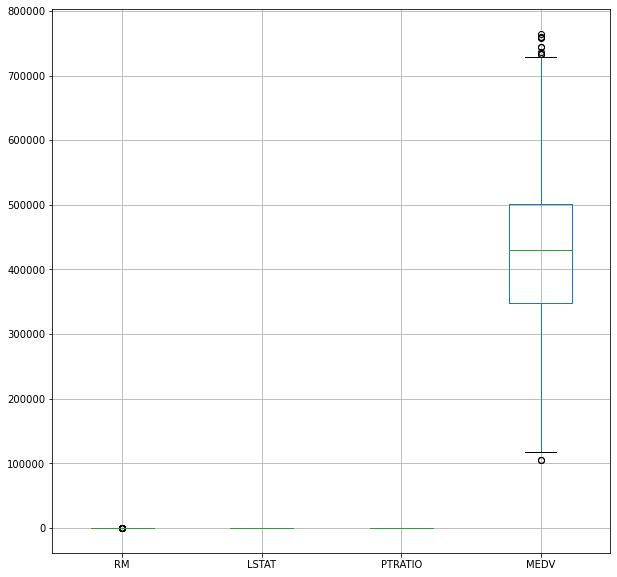

In [16]:
o_df.boxplot(figsize = (10, 10))

array([[<AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'LSTAT'}>],
       [<AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'MEDV'}>]], dtype=object)

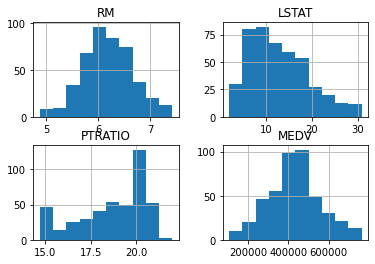

In [17]:
o_df.hist()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

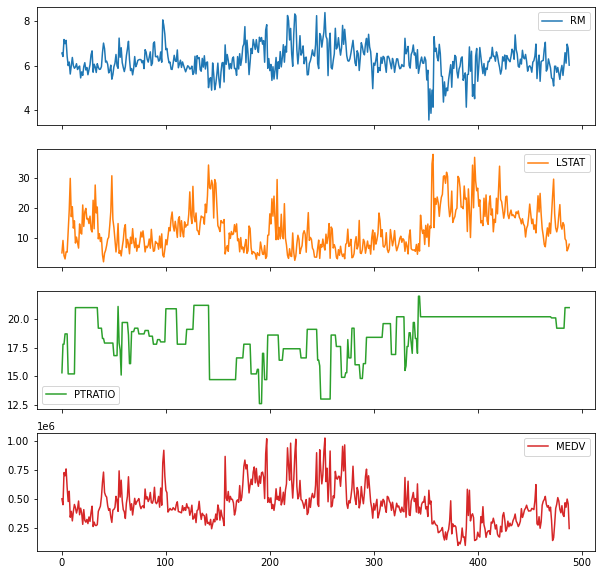

In [18]:
df.plot(subplots = True, figsize = (10, 10))

<AxesSubplot:>

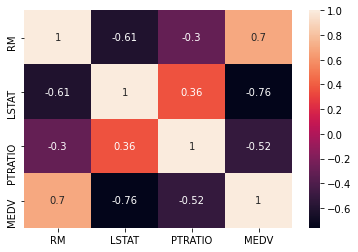

In [19]:
sns.heatmap(df.corr(),annot=True)

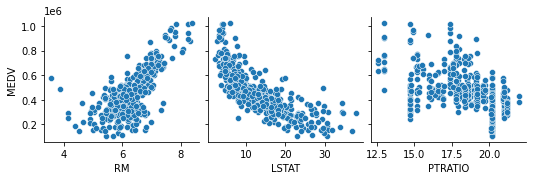

In [20]:
sns.pairplot(x_vars=['RM', 'LSTAT', 'PTRATIO'],y_vars=["MEDV"],data=df)

In [23]:
x=df.drop(columns=["MEDV","PTRATIO"])

In [24]:
y=df["MEDV"]

In [25]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [28]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [29]:
ypred = model.predict(xtest)

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [34]:
mse=mean_squared_error(ytest,ypred)
print("MSE:",mse)
print("RMSE:",np.sqrt(mse))
mae=mean_absolute_error(ytest,ypred)
print("MAE:",mae)
score=r2_score(ytest,ypred)
print("R squared :",score)

MSE: 11479476853.820753
RMSE: 107142.32055458176
MAE: 79890.01912206096
R-squared : 0.5957692986235192


In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtrain)
sc_xtrain = sc.transform(xtrain)
sc_xtest = sc.transform(xtest)

In [38]:
model = LinearRegression()
model.fit(sc_xtrain, ytrain)

LinearRegression()

In [40]:
sc_ypred = model.predict(sc_xtest)

In [41]:
mse=mean_squared_error(ytest,sc_ypred)
print("MSE:",mse)
print("RMSE:",np.sqrt(mse))
mae=mean_absolute_error(ytest,sc_ypred)
print("MAE:",mae)
score=r2_score(ytest,sc_ypred)
print("R-squared :",score)

MSE: 11479476853.820753
RMSE: 107142.32055458176
MAE: 79890.01912206096
R-squared : 0.5957692986235192
